In [1]:
import mne 
import pywt
import numpy as np
from sklearn.cross_decomposition import CCA
import mne.time_frequency
import matplotlib.pyplot as plt


In [2]:
# epochs = mne.read_epochs("ica-epo.fif")
epochs = mne.read_epochs("all_subjects-epo.fif")

data = epochs.get_data(picks=['O1','Oz','O2'],copy=False)


Reading C:\Users\dhanu\Desktop\Caps\code\all_subjects-epo.fif ...
    Found the data of interest:
        t =       0.00 ...    5996.00 ms
        0 CTF compensation matrices available
Not setting metadata
1050 matching events found
No baseline correction applied
0 projection items activated


C:\Users\dhanu\AppData\Local\Temp\ipykernel_2308\290596708.py:29: FutureWarning: The default value of `zero_mean` will change from `False` to `True` in version 1.8. Set the value explicitly to avoid this warning.
  power = mne.time_frequency.tfr_array_morlet(X_c[np.newaxis, np.newaxis, :, 0],
C:\Users\dhanu\AppData\Local\Temp\ipykernel_2308\290596708.py:29: FutureWarning: The default value of `zero_mean` will change from `False` to `True` in version 1.8. Set the value explicitly to avoid this warning.
  power = mne.time_frequency.tfr_array_morlet(X_c[np.newaxis, np.newaxis, :, 0],
C:\Users\dhanu\AppData\Local\Temp\ipykernel_2308\290596708.py:29: FutureWarning: The default value of `zero_mean` will change from `False` to `True` in version 1.8. Set the value explicitly to avoid this warning.
  power = mne.time_frequency.tfr_array_morlet(X_c[np.newaxis, np.newaxis, :, 0],
C:\Users\dhanu\AppData\Local\Temp\ipykernel_2308\290596708.py:29: FutureWarning: The default value of `zero_mean` will

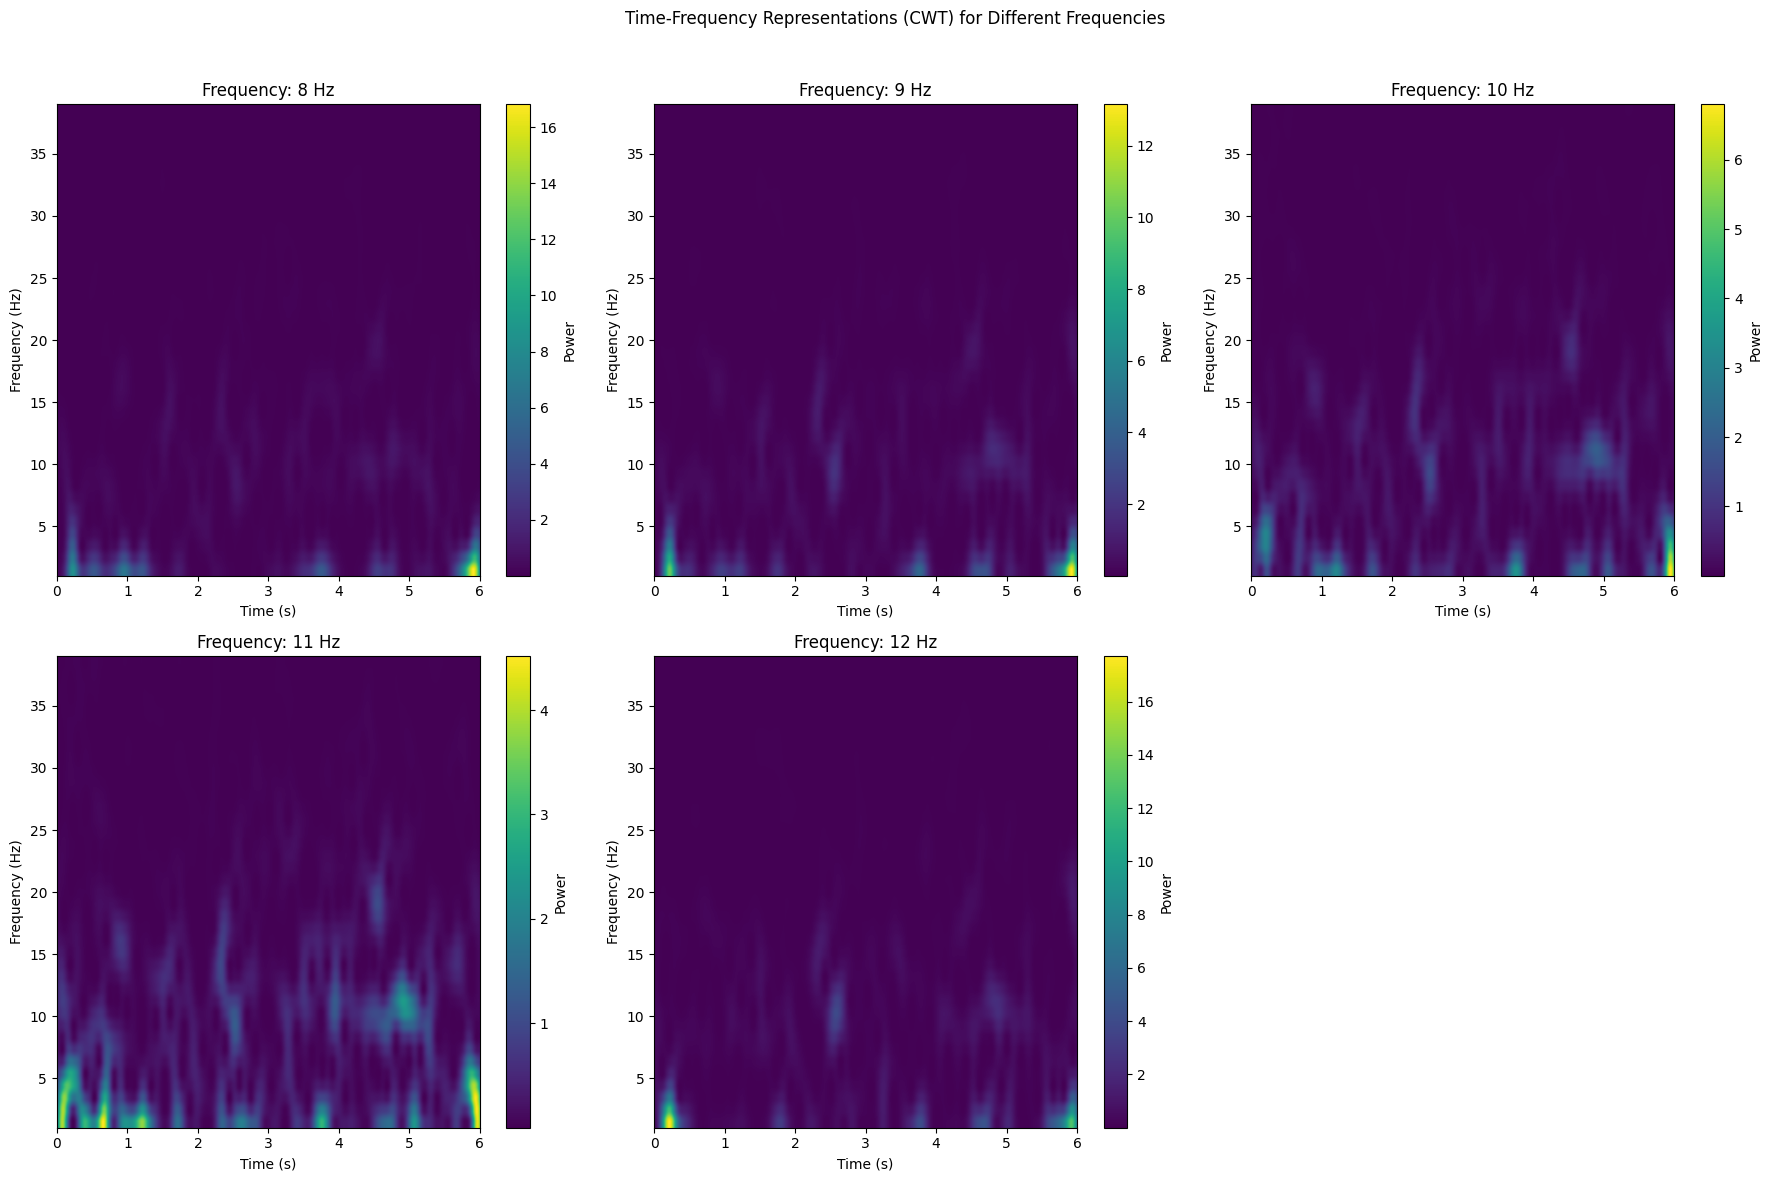

In [3]:
# Function to generate reference signals
def generate_reference_signals(frequencies, sfreq, n_samples):
    t = np.arange(n_samples) / sfreq
    ref_signals = []
    for freq in frequencies:
        ref_signals.append(np.sin(2 * np.pi * freq * t))
        ref_signals.append(np.cos(2 * np.pi * freq * t))
    return np.array(ref_signals).T

sfreq = epochs.info["sfreq"]
n_epochs, n_channels, n_samples = data.shape

cca = CCA(n_components=1)


# Set up the figure and subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Time-Frequency Representations (CWT) for Different Frequencies')
data_channel = epochs[30].get_data(picks=['O2', 'O1', 'Oz'])[0].T

for idx, i in enumerate(range(8, 13)):
    ref_signals = generate_reference_signals([i], sfreq, n_samples)
    X_c, Y_c = cca.fit_transform(data_channel, ref_signals)

    # Compute CWT using Morlet wavelets
    freqs = np.arange(1, 40, 1)  # Define the frequency range of interest
    n_cycles = freqs / 2.  # Define the number of cycles in each wavelet

    power = mne.time_frequency.tfr_array_morlet(X_c[np.newaxis, np.newaxis, :, 0],
                                                sfreq=sfreq,
                                                freqs=freqs,
                                                n_cycles=n_cycles,
                                                output='power')

    # Plot the time-frequency representation in a subplot
    ax = axes[idx // 3, idx % 3]
    img = ax.imshow(power[0, 0, :, :], aspect='auto', origin='lower', extent=[0, len(data_channel) / sfreq, freqs[0], freqs[-1]])
    ax.set_title(f'Frequency: {i} Hz')
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Frequency (Hz)')
    fig.colorbar(img, ax=ax, label='Power')

# Hide any unused subplots (if there are less than 6 plots)
for idx in range(len(range(8, 13)), 6):
    fig.delaxes(axes[idx // 3, idx % 3])

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to make room for the main title
plt.show()

C:\Users\dhanu\AppData\Local\Temp\ipykernel_2308\3164894261.py:9: FutureWarning: The default value of `zero_mean` will change from `False` to `True` in version 1.8. Set the value explicitly to avoid this warning.
  power = mne.time_frequency.tfr_array_morlet(channel_data,
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


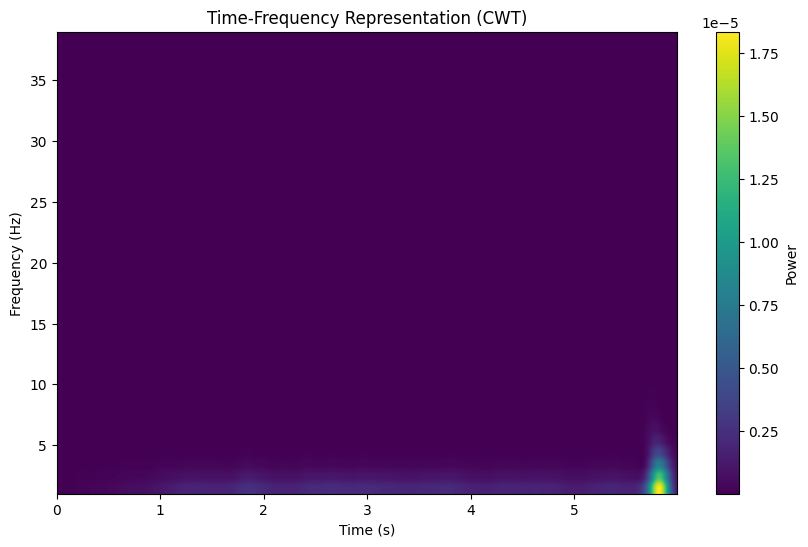

In [4]:
import mne.time_frequency
channel_data = epochs[30].get_data(copy=False)
# Compute CWT using Morlet wavelets
freqs = np.arange(1, 40, 1)  # Define the frequency range of interest
n_cycles = freqs / 2.  # Define the number of cycles in each wavelet
sfreq = 250
times = np.arange(1500) / sfreq

power = mne.time_frequency.tfr_array_morlet(channel_data,
                                            sfreq=sfreq,
                                            freqs=freqs,
                                            n_cycles=n_cycles,
                                            output='power')

# Plot the time-frequency representation
plt.figure(figsize=(10, 6))
plt.imshow(power[0, 0, :, :], aspect='auto', extent=[times[0], times[-1], freqs[0], freqs[-1]], origin='lower')
plt.title('Time-Frequency Representation (CWT)')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.colorbar(label='Power')
plt.show()


C:\Users\dhanu\AppData\Local\Temp\ipykernel_2308\761962568.py:30: FutureWarning: The default value of `zero_mean` will change from `False` to `True` in version 1.8. Set the value explicitly to avoid this warning.
  power = mne.time_frequency.tfr_array_morlet(X_c[np.newaxis, np.newaxis, :, 0],
C:\Users\dhanu\AppData\Local\Temp\ipykernel_2308\761962568.py:30: FutureWarning: The default value of `zero_mean` will change from `False` to `True` in version 1.8. Set the value explicitly to avoid this warning.
  power = mne.time_frequency.tfr_array_morlet(X_c[np.newaxis, np.newaxis, :, 0],
C:\Users\dhanu\AppData\Local\Temp\ipykernel_2308\761962568.py:30: FutureWarning: The default value of `zero_mean` will change from `False` to `True` in version 1.8. Set the value explicitly to avoid this warning.
  power = mne.time_frequency.tfr_array_morlet(X_c[np.newaxis, np.newaxis, :, 0],
C:\Users\dhanu\AppData\Local\Temp\ipykernel_2308\761962568.py:30: FutureWarning: The default value of `zero_mean` will

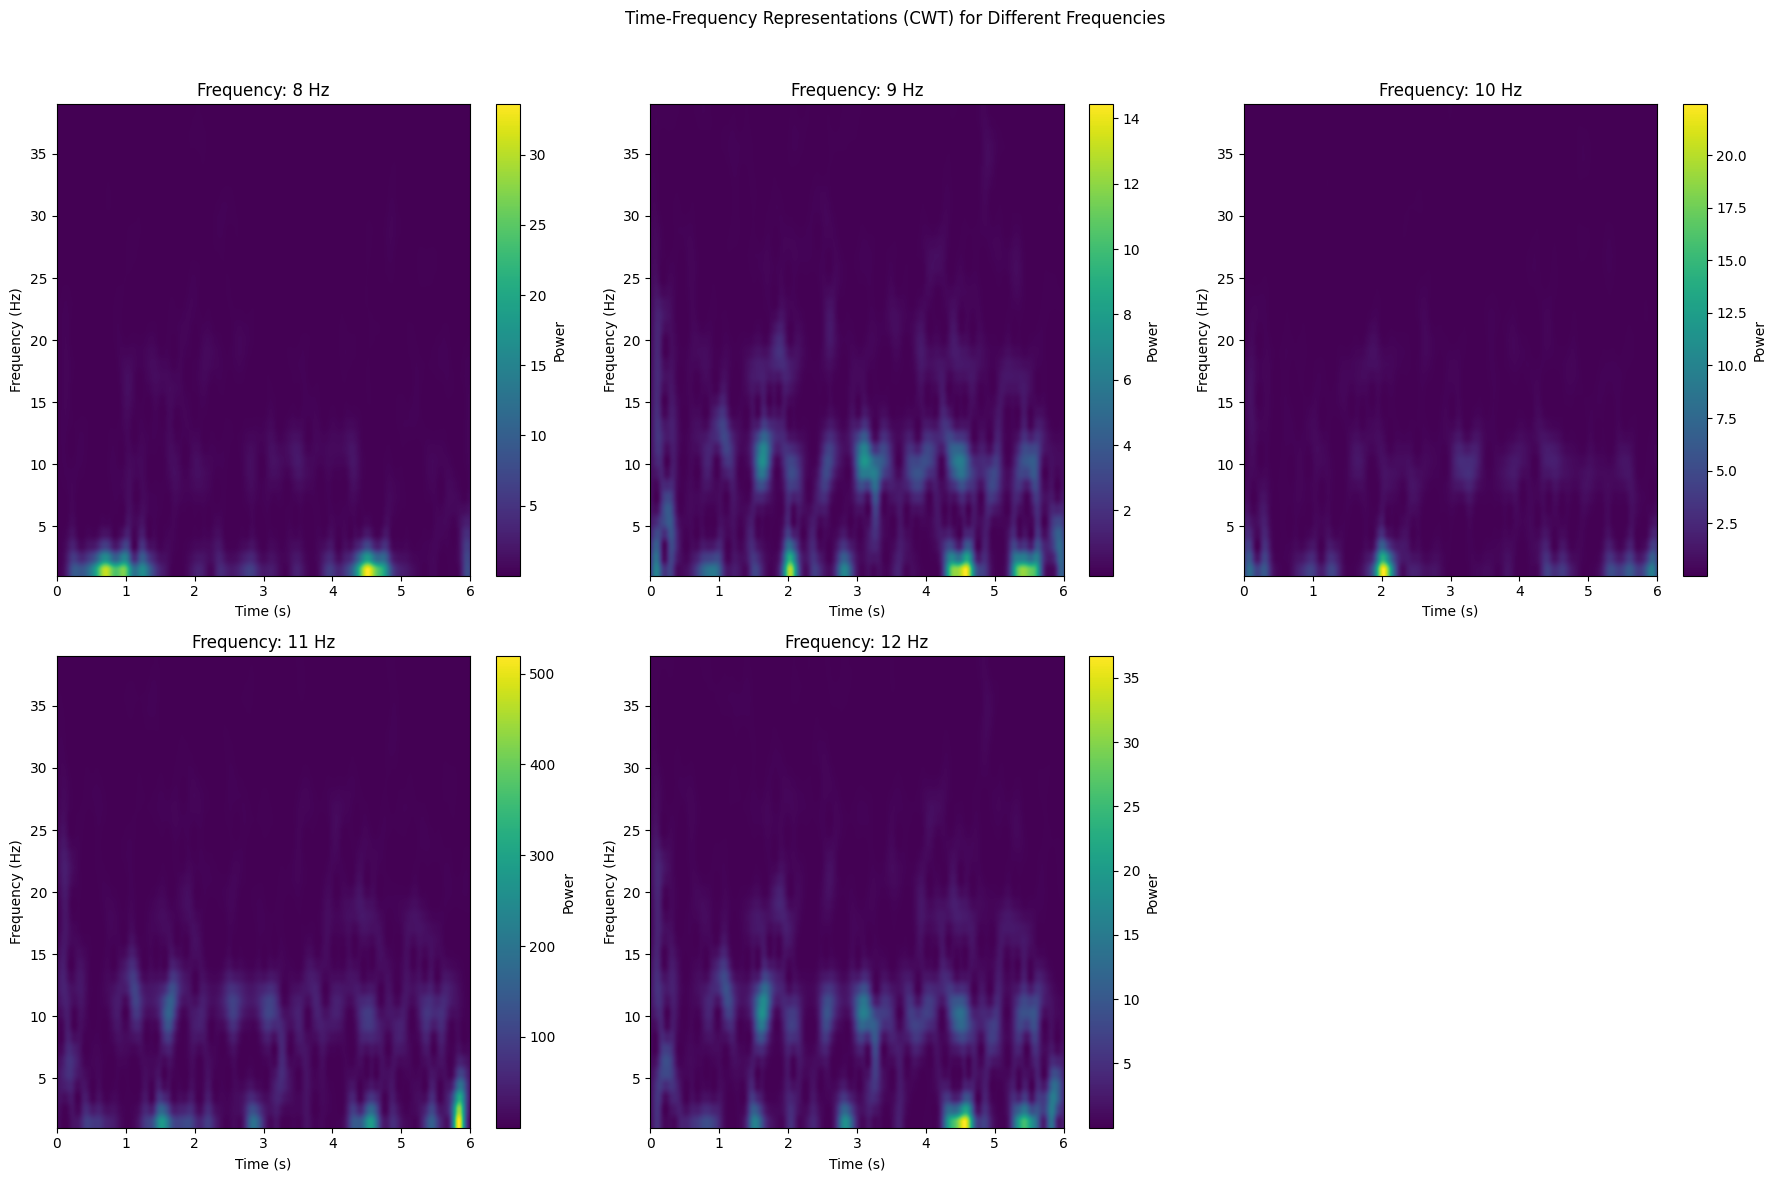

In [5]:
# Function to generate reference signals
def generate_reference_signals(frequencies, sfreq, n_samples):
    t = np.arange(n_samples) / sfreq
    ref_signals = []
    for freq in frequencies:
        ref_signals.append(np.sin(2 * np.pi * freq * t))
        ref_signals.append(np.cos(2 * np.pi * freq * t))
    return np.array(ref_signals).T

sfreq = epochs.info["sfreq"]
n_epochs, n_channels, n_samples = data.shape

cca = CCA(n_components=1)



# Set up the figure and subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Time-Frequency Representations (CWT) for Different Frequencies')
data_channel = epochs[6].get_data(picks=['O2', 'O1', 'Oz'])[0].T
for idx, i in enumerate(range(8, 13)):
    ref_signals = generate_reference_signals([i], sfreq, n_samples)
    
    X_c, Y_c = cca.fit_transform(data_channel, ref_signals)

    # Compute CWT using Morlet wavelets
    freqs = np.arange(1, 40, 1)  # Define the frequency range of interest
    n_cycles = freqs / 2.  # Define the number of cycles in each wavelet

    power = mne.time_frequency.tfr_array_morlet(X_c[np.newaxis, np.newaxis, :, 0],
                                                sfreq=sfreq,
                                                freqs=freqs,
                                                n_cycles=n_cycles,
                                                output='power')

    # Plot the time-frequency representation in a subplot
    ax = axes[idx // 3, idx % 3]
    img = ax.imshow(power[0, 0, :, :], aspect='auto', origin='lower', extent=[0, len(data_channel) / sfreq, freqs[0], freqs[-1]])
    ax.set_title(f'Frequency: {i} Hz')
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Frequency (Hz)')
    fig.colorbar(img, ax=ax, label='Power')

# Hide any unused subplots (if there are less than 6 plots)
for idx in range(len(range(8, 13)), 6):
    fig.delaxes(axes[idx // 3, idx % 3])

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to make room for the main title
plt.show()